In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations, permutations

In [2]:
def compute_probability_distribution(data):
    data = fitsio.read(filename)
    s = np.shape(data)
    n_tot = s[0]*s[1]
    n_side = 2

    n_x = (s[0]//n_side) - 1
    n_y = (s[1]//n_side) - 1

    new_data = np.zeros((n_x*n_y,n_side*n_side))
    sorted_ids = np.zeros((n_x*n_y,n_side*n_side), dtype=int)
    for i in range(0,n_x):
        for j in range(0, n_y):
            tmp = data[i*n_side: (i+1)*n_side, j*n_side:(j+1)*n_side].flatten()
            new_data[i + j*n_x,:] = tmp 
            sorted_ids[i + j*n_x,:] = np.int_(np.argsort(tmp))

    sorts = {}

    for i in range(n_x*n_y):
        s = ''.join(str(j) for j in sorted_ids[i,:])
        try:
            sorts[s] += 1
        except:
            sorts[s] = 1
    
    
    # return the probabilities in the order provided by the permutations routine
    a = '0123'
    perms = permutations(a, 4)
    sorted_perms = []
    for p in perms:
        sorted_perms.append(''.join(i for i in p))
        
    values = []
    for p in sorted_perms:
        values.append(sorts[p])
    values = np.array(values)
    values = values/np.sum(values)
    
    
    return values

In [3]:
pb_petals = []
for i in range(10):
    filename = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104284/sky-b{}-00104284.fits'.format(i)
    pb_petals.append(compute_probability_distribution(filename))
    print(i)
    

pr_petals = []
for i in range(10):
    filename = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104284/sky-r{}-00104284.fits'.format(i)
    pr_petals.append(compute_probability_distribution(filename))
    print(i)
    
pz_petals = []
for i in range(10):
    filename = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104284/sky-z{}-00104284.fits'.format(i)
    pz_petals.append(compute_probability_distribution(filename))
    print(i)



#filename = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104282/cframe-b1-00104282.fits'

#pb = compute_probability_distribution(filename)

#filename = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104282/cframe-z1-00104282.fits'
#pz = compute_probability_distribution(filename)



0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


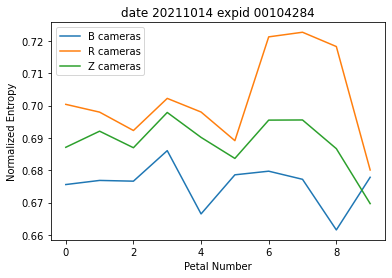

In [4]:
entropy_b_petals = np.ones(10)
entropy_r_petals = np.ones(10)
entropy_z_petals = np.ones(10)
for i in range(10):
    for entropy_petals, p_petals in zip([entropy_b_petals, entropy_r_petals, entropy_z_petals], [pb_petals, pr_petals, pz_petals]):
        p = np.array(p_petals[i])
        entropy_petals[i] = np.sum(-p*np.log2(p))/np.log2(24)
    
plt.plot(entropy_b_petals, label='B cameras')
plt.plot(entropy_r_petals, label='R cameras')
plt.plot(entropy_z_petals, label='Z cameras')
plt.xlabel('Petal Number')
plt.ylabel('Normalized Entropy')
plt.title('date 20211014 expid 00104284')
plt.legend()

In [5]:
pb_petals = []
for i in range(10):
    filename = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104282/sky-b{}-00104282.fits'.format(i)
    pb_petals.append(compute_probability_distribution(filename))
    print(i)
    

pr_petals = []
for i in range(10):
    filename = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104282/sky-r{}-00104282.fits'.format(i)
    pr_petals.append(compute_probability_distribution(filename))
    print(i)
    
pz_petals = []
for i in range(10):
    filename = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104282/sky-z{}-00104282.fits'.format(i)
    pz_petals.append(compute_probability_distribution(filename))
    print(i)


0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


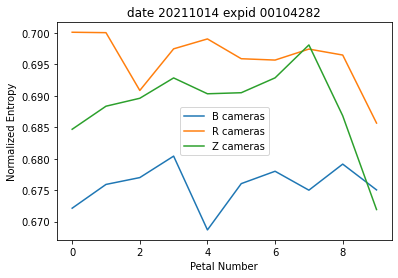

In [6]:
entropy_b_petals = np.ones(10)
entropy_r_petals = np.ones(10)
entropy_z_petals = np.ones(10)
for i in range(10):
    for entropy_petals, p_petals in zip([entropy_b_petals, entropy_r_petals, entropy_z_petals], [pb_petals, pr_petals, pz_petals]):
        p = np.array(p_petals[i])
        entropy_petals[i] = np.sum(-p*np.log2(p))/np.log2(24)
    
plt.plot(entropy_b_petals, label='B cameras')
plt.plot(entropy_r_petals, label='R cameras')
plt.plot(entropy_z_petals, label='Z cameras')
plt.xlabel('Petal Number')
plt.ylabel('Normalized Entropy')
plt.title('date 20211014 expid 00104282')
plt.legend()

In [8]:
pb_petals = []
for i in range(10):
    filename = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104285/sky-b{}-00104285.fits'.format(i)
    pb_petals.append(compute_probability_distribution(filename))
    print(i)
    

pr_petals = []
for i in range(10):
    filename = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104285/sky-r{}-00104285.fits'.format(i)
    pr_petals.append(compute_probability_distribution(filename))
    print(i)
    
pz_petals = []
for i in range(10):
    filename = '/global/cfs/cdirs/desi/spectro/redux/dataqa-tutorial/exposures/20211014/00104285/sky-z{}-00104285.fits'.format(i)
    pz_petals.append(compute_probability_distribution(filename))
    print(i)



0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


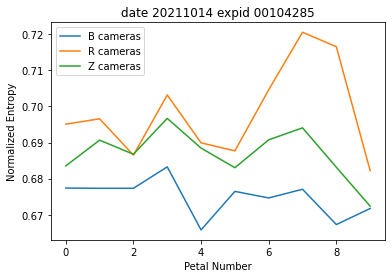

In [9]:
entropy_b_petals = np.ones(10)
entropy_r_petals = np.ones(10)
entropy_z_petals = np.ones(10)
for i in range(10):
    for entropy_petals, p_petals in zip([entropy_b_petals, entropy_r_petals, entropy_z_petals], [pb_petals, pr_petals, pz_petals]):
        p = np.array(p_petals[i])
        entropy_petals[i] = np.sum(-p*np.log2(p))/np.log2(24)
    
plt.plot(entropy_b_petals, label='B cameras')
plt.plot(entropy_r_petals, label='R cameras')
plt.plot(entropy_z_petals, label='Z cameras')
plt.xlabel('Petal Number')
plt.ylabel('Normalized Entropy')
plt.title('date 20211014 expid 00104285')
plt.legend()